In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024 머신 코스 - 1/경기도 지역화폐/경기도 수원시_지역화폐 결제 정보_20201211.csv', encoding='cp949')

In [ ]:
df

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,데이터기준일자
0,2020-11,권선구,고색동,남,10대,레져업소,20,106900,2020-12-11
1,2020-11,권선구,고색동,남,10대,보건위생,3,29000,2020-12-11
2,2020-11,권선구,고색동,남,10대,서적문구,1,5600,2020-12-11
3,2020-11,권선구,고색동,남,10대,약국,1,13600,2020-12-11
4,2020-11,권선구,고색동,남,10대,유통업영리,70,2160910,2020-12-11
...,...,...,...,...,...,...,...,...,...
128645,2019-04,팔달구,화서동,여,60대이상,약국,2,17900,2020-12-11
128646,2019-04,팔달구,화서동,여,60대이상,유통업영리,3,27690,2020-12-11
128647,2019-04,팔달구,화서동,여,60대이상,음료식품,2,12000,2020-12-11
128648,2019-04,팔달구,화서동,여,60대이상,의원,4,72900,2020-12-11


In [ ]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y-%m')

df['월'] = df['기준년월'].dt.month
df['요일'] = df['기준년월'].dt.dayofweek

print(df.dtypes)

기준년월       datetime64[ns]
시군구명               object
읍면동명               object
성별                 object
연령대                object
업종명                object
결제건수                int64
결제금액                int64
데이터기준일자            object
월                   int32
요일                  int32
dtype: object


In [ ]:
weekday_map = {0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}

df['요일'] = df['기준년월'].dt.dayofweek.map(weekday_map)

In [ ]:
df

,기준년월,시군구명,읍면동명,성별,연령대,업종명,결제건수,결제금액,데이터기준일자,월,요일
0,2020-11-01,권선구,고색동,남,10대,레져업소,20,106900,2020-12-11,11,일요일
1,2020-11-01,권선구,고색동,남,10대,보건위생,3,29000,2020-12-11,11,일요일
2,2020-11-01,권선구,고색동,남,10대,서적문구,1,5600,2020-12-11,11,일요일
3,2020-11-01,권선구,고색동,남,10대,약국,1,13600,2020-12-11,11,일요일
4,2020-11-01,권선구,고색동,남,10대,유통업영리,70,2160910,2020-12-11,11,일요일
...,...,...,...,...,...,...,...,...,...,...,...
128645,2019-04-01,팔달구,화서동,여,60대이상,약국,2,17900,2020-12-11,4,월요일
128646,2019-04-01,팔달구,화서동,여,60대이상,유통업영리,3,27690,2020-12-11,4,월요일
128647,2019-04-01,팔달구,화서동,여,60대이상,음료식품,2,12000,2020-12-11,4,월요일
128648,2019-04-01,팔달구,화서동,여,60대이상,의원,4,72900,2020-12-11,4,월요일




---



---



In [ ]:
result = df.groupby('기준년월')['결제금액'].sum().reset_index()
print(result)

         기준년월         결제금액
0  2019-04-01    145854678
1  2019-05-01   2020002695
2  2019-06-01   2321087040
3  2019-07-01   2739550377
4  2019-08-01   3281453945
5  2019-09-01   2438201912
6  2019-10-01   3364018252
7  2019-11-01   3241064404
8  2019-12-01   3683393449
9  2020-01-01   3792497510
10 2020-02-01   3071089666
11 2020-03-01   4661766253
12 2020-04-01  17384756045
13 2020-05-01  38648289444
14 2020-06-01  27787404703
15 2020-07-01  23010403011
16 2020-08-01  16924749224
17 2020-09-01  22056120549
18 2020-10-01  24909282874
19 2020-11-01  25671101354


In [ ]:
result2 = df.groupby('월')['결제금액'].mean().reset_index
print(result2)

AttributeError: 'method' object has no attribute 'columns'

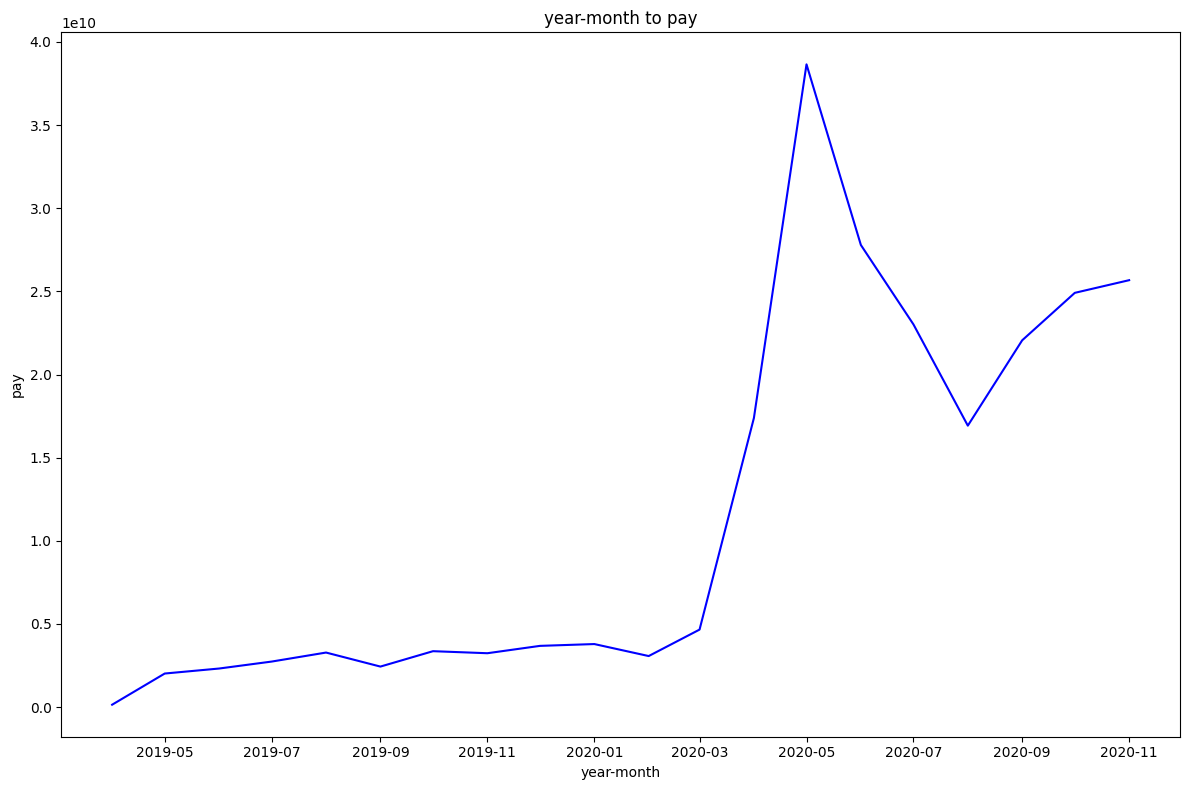

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(result['기준년월'], result['결제금액'], color='blue')

plt.title('year-month to pay')
plt.xlabel('year-month')
plt.ylabel('pay')

plt.tight_layout()
plt.show()